# GPX - Elevation profile generator

GPX profile of **Munich - Trento** mountain bike tour

In [1]:
import gpxpy
import os
import pandas as pd
import matplotlib
from gpxpy.geo import distance, Location
import matplotlib.pyplot as plt

In [2]:
gpx_file = open('muenchentrient.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

### GPX information

In [3]:
print("{} track(s)".format(len(gpx.tracks)))
track = gpx.tracks[0]

print("{} segment(s)".format(len(track.segments)))
segment = track.segments[0]

print("{} point(s)".format(len(segment.points)))

1 track(s)
1 segment(s)
25402 point(s)


### elevation only
- put it to dfDist (panda data frame) and distList (list)
- save to elevation.csv

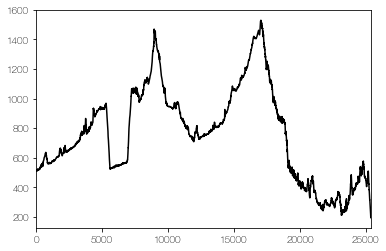

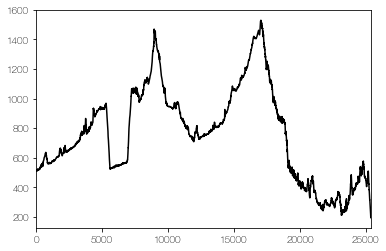

In [6]:
dist_points = []
distList = []

for track in gpx.tracks:
    for segment in track.segments:
        last = segment.points[0]
        dist = 0
        i = 1
        for point in segment.points:
            dict = {#'Timestamp' : point.time,
                    #'Latitude' : point.latitude,
                    #'Longitude' : point.longitude,
                    'Elevation' : point.elevation,
                    #'Distance'  : dist
                    }
            dist_points.append(dict)
            if i%100==0:
                distList.append(point.elevation)
                i = 1
            i+=1

#x = 1:distList.length
#Parse the gpx files into a pandas dataframe
dfDist = pd.DataFrame(dist_points)

dfDist.to_csv('elevation.csv')

dfDist.plot(legend=None, color='black')
#fig, ax = plt.subplots()
#fig.patch.set_visible(False)
#ax.axis('off')
#plt.xticks([])
#plt.yticks([])
#with open('test.png', 'w') as outfile:
#fig.canvas.print_png('profile.png')
#plt.savefig('profile.png')
plt.show()


### reduce height

In [209]:
s = pd.Series(distList)
distList = (s * 0.8).tolist()

### interpolation

256
256


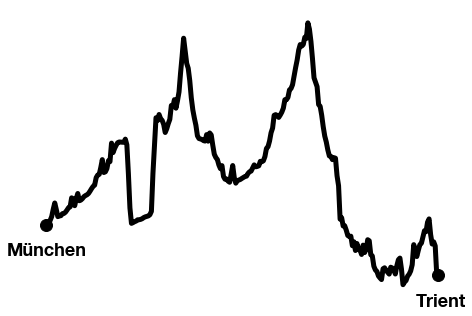

In [15]:
from scipy.interpolate import interp1d
from pylab import arrow

cFontSize = 18
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 

x = range(0,len(distList))
print(len(x))
print(len(distList))

f = interp1d(x, distList, kind='cubic')


#plt.fill_between( x, f(x), color="black", alpha=0.3)
#plt.xticks([])
#plt.yticks([])
ax = plt.axes([0,0,1,1], frameon=False)

# Then we disable our xaxis and yaxis completely. If we just say plt.axis('off'),
# they are still used in the computation of the image padding.
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

plt.plot(x,f(x),color='black', linewidth=5)
plt.plot(0, f(0), 'ko', markersize=12) 
plt.plot(len(distList), distList[-1], 'ko', markersize=12)

plt.annotate('München', xy=(0, f(0)), xytext=(-25, f(0)-150), fontsize=cFontSize, fontweight='bold')
plt.annotate('Trient', xy=(len(distList), distList[-1]), xytext=(len(distList)-15, f(0)-400), fontsize=cFontSize, fontweight='bold')

plt.savefig('realdeal.png', dpi = 300, transparent=True, bbox_inches="tight")
plt.savefig('realdeal.svg', transparent=True, bbox_inches="tight")


plt.show()

### get distance and elevation

In [56]:
from gpxpy.geo import distance, Location
#Parse a GPX file into a list of dictoinaries.  
#Each dict is one row of the final dataset

dist_elevation_points = []
for track in gpx.tracks:
    for segment in track.segments:
        last = segment.points[0]
        dist = 0
        for point in segment.points:
            dist += distance(last.latitude, last.longitude, last.elevation,
                                          point.latitude, point.longitude, point.elevation)
            dict = {#'Timestamp' : point.time,
                    #'Latitude' : point.latitude,
                    #'Longitude' : point.longitude,
                    'Elevation' : point.elevation,
                    'Distance'  : dist
                    }
            dist_elevation_points.append(dict)

#Parse the gpx files into a pandas dataframe
dfDistElev = pd.DataFrame(dist_elevation_points)

#Write the data out to a CSV file
dfDistElev.to_csv('distance_elevation.csv')


In [57]:
dfDistElev.head(10)

,Distance,Elevation
0,0.000000,509.4
1,7.224693,509.3
2,18.677611,509.3
3,37.637535,509.3
4,105.807150,509.4
5,188.719217,509.4
6,276.331082,509.4
7,370.284821,509.4
8,467.556724,509.4
9,572.230977,511.8


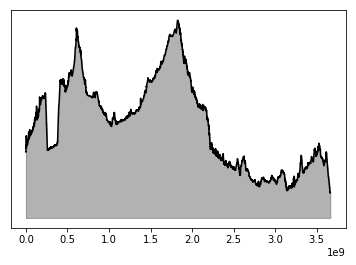

In [120]:
x = dfDistElev.loc[:,'Distance']
y = dfDistElev.loc[:,'Elevation']
plt.fill_between( x, y, color="black", alpha=0.3)
plt.xticks([])
plt.yticks([])
plt.plot(x,y,color="black")
plt.show()